In [15]:
import numpy as np
import pandas as pd

In [16]:
data = pd.read_excel('исследование.xlsx')

In [17]:
data.shape

(384, 21)

In [18]:
data.head()

,Отметка времени,2.\tЧасто ли Вы делаете покупки одежды/обуви/аксессуаров в Instagram?,1.\tГде Вы чаще всего узнаете о профилях магазинов одежды/обуви/аксессуаров в Instagram?,"3.\tСколько обычно в среднем проходит времени между моментом, когда Вы только узнали о магазине одежды/обуви/аксессуаров в Instagram и моментом, когда Вы решаете купить там что-то?","4.\tСпрашиваете ли вы мнение своих друзей/близких перед тем, как купить одежду/обувь/аксессуары в Instagram?","5.\tНасколько, по вашему мнению, наличие КРАСИВЫХ И ЧЕТКИХ ФОТОГРАФИЙ ТОВАРОВ в профиле может подтолкнуть вас к покупке одежды/обуви/аксессуаров в Instagram? (1 – абсолютно не подтолкнёт, 5 – точно подтолкнёт)","6.\tНасколько, по вашему мнению, наличие ПОДРОБНОГО ОПИСАНИЯ ТОВАРОВ МОЖЕТ подтолкнуть вас к покупке одежды/обуви/аксессуаров в Instagram? (1 – абсолютно не подтолкнёт, 5 – точно подтолкнёт)","7.\tНасколько, по вашему мнению, наличие ОТЗЫВОВ может подтолкнуть вас к покупке одежды/обуви/аксессуаров в Instagram? (1 – абсолютно не подтолкнёт, 5 – точно подтолкнёт)","8.\tНасколько, по вашему мнению, РЕЙТИНГ ПРОФИЛЯ МАГАЗИНА (большое число подписчиков/лайков, комментариев) может подтолкнуть вас к покупке одежды/обуви/аксессуаров в Instagram? (1 – абсолютно не подтолкнёт, 5 – точно подтолкнёт)","9.\tНасколько, по вашему мнению, ОПЕРАТИВНАЯ ПОМОЩЬ И ВЕЖЛИВОЕ ОБЩЕНИЕ СО СТОРОНЫ МЕНЕДЖЕРА ПРОФИЛЯ (консультирование по ассортименту, ценам итд) может подтолкнуть вас к покупке одежды/обуви/аксессуаров в Instagram? (1 – абсолютно не подтолкнёт, 5 – точно подтолкнёт)",...,"11.\tНасколько, по вашему мнению, тот факт, что МАГАЗИН ПОСОВЕТОВАЛ ВАШ ДРУГ/РОДСТВЕННИК может подтолкнуть вас к покупке одежды/обуви/аксессуаров в Instagram? (1 – абсолютно не подтолкнёт, 5 – точно подтолкнёт)","12.\tНасколько, по вашему мнению, наличие ИНТЕРЕСНЫХ/ПОЛЕЗНЫХ ПОСТОВ В ПРОФИЛЕ (пример: «Как правильно ухаживать за одеждой/обувью» итп) может подтолкнуть вас к покупке одежды/обуви/аксессуаров в Instagram? (1 – абсолютно не подтолкнёт, 5 – точно подтолкнёт)","13.\tНасколько, по вашему мнению, наличие цен на товары в открытом доступе (многие магазины в Instagram их не указывают) может подтолкнуть вас к покупке одежды/обуви/аксессуаров в Instagram? (1 – абсолютно не подтолкнёт, 5 – точно подтолкнёт)","14. Насколько Вы согласны с данным утверждением: ""Я не хочу покупать одежду/обувь/аксессуары в Instagram, так как считаю, что цены обычно завышены."" (1 - абсолютно не согласен, 5 - абсолютно согласен)","15. Насколько Вы согласны с данным утверждением: ""Я не хочу покупать одежду/обувь/аксессуары в Instagram, так как сомневаюсь в их качестве."" (1 - абсолютно не согласен, 5 - абсолютно согласен)","16. Насколько Вы согласны с данным утверждением: ""Я не хочу покупать одежду/обувь/аксессуары в Instagram, так как боюсь наткнуться на мошенников."" (1 - абсолютно не согласен, 5 - абсолютно согласен)",Укажите Ваш пол:,Укажите Ваш возраст цифрой:,Укажите Ваш уровень образования:,16.\tОхарактеризуйте средний доход на каждого члена Вашей семьи в месяц (в российских рублях):
0,2021-05-02 13:39:33.969000,Раз в полгода,Реклама в ленте/сториз Instagram,Около недели,"Редко, но бывает",5,3,4,4,3,...,3,3,5,4,4,4,Мужской,21.0,Незаконченное высшее (3 курса вуза и выше) про...,51 000 – 60 000
1,2021-05-02 13:51:13.075000,Раз в год,Реклама у блогеров,Несколько месяцев,Никогда,3,4,1,5,2,...,4,2,4,4,5,5,Женский,21.0,Высшее профессиональное образование - Бакалавриат,61 000 – 70 000
2,2021-05-02 13:58:31.236000,Реже одного раза в год,На других интернет-площадках магазина (на сайт...,Несколько дней,"Редко, но бывает",4,4,3,3,4,...,4,2,2,2,4,4,Женский,21.0,Незаконченное высшее (3 курса вуза и выше) про...,71 000 – 80 000
3,2021-05-02 14:08:38.517000,Раз в год,На других интернет-площадках магазина (на сайт...,Несколько недель,"Часто, но не всегда",5,5,5,4,5,...,4,4,5,3,3,4,Женский,21.0,Незаконченное высшее (3 курса вуза и выше) про...,41 000 – 50 000
4,2021-05-02 14:10:47.248000,"Не покупал-(а), но планирую попробовать",На 

In [19]:
data.columns = ['Time', 'ShoppingFrequency', 'Advertising', 'PurchaseDecisionTime', 'FriendsOpinion', 
                'Photos', 'Description', 'Reviews', 'Rating', 'Manager', 'BloggersAdvice', 'FriendAdvice',
                'InterestingPosts', 'Prices', 'Overpriced', 'Quality', 'Fraud', 'Sex', 'Age', 'Education',
                'Income']

In [20]:
data.drop('Time', 1, inplace = True)

In [21]:
data['Advertising'] = data.Advertising.str.replace('на сайте, на странице в другой соц. сети', '')

In [22]:
data['Advertising'] = data.Advertising.str.replace('(', '')

In [23]:
data['Advertising'] = data.Advertising.str.replace(')', '')

In [24]:
data.head()

,ShoppingFrequency,Advertising,PurchaseDecisionTime,FriendsOpinion,Photos,Description,Reviews,Rating,Manager,BloggersAdvice,FriendAdvice,InterestingPosts,Prices,Overpriced,Quality,Fraud,Sex,Age,Education,Income
0,Раз в полгода,Реклама в ленте/сториз Instagram,Около недели,"Редко, но бывает",5,3,4,4,3,2,3,3,5,4,4,4,Мужской,21.0,Незаконченное высшее (3 курса вуза и выше) про...,51 000 – 60 000
1,Раз в год,Реклама у блогеров,Несколько месяцев,Никогда,3,4,1,5,2,1,4,2,4,4,5,5,Женский,21.0,Высшее профессиональное образование - Бакалавриат,61 000 – 70 000
2,Реже одного раза в год,На других интернет-площадках магазина,Несколько дней,"Редко, но бывает",4,4,3,3,4,4,4,2,2,2,4,4,Женский,21.0,Незаконченное высшее (3 курса вуза и выше) про...,71 000 – 80 000
3,Раз в год,На других интернет-площадках магазина,Несколько недель,"Часто, но не всегда",5,5,5,4,5,3,4,4,5,3,3,4,Женский,21.0,Незаконченное высшее (3 курса вуза и выше) про...,41 000 – 50 000
4,"Не покупал-(а), но планирую попробовать",На других интернет-площадках магазина,Несколько месяцев,"Редко, но бывает",3,5,3,3,5,3,4,1,4,3,3,5,Женский,45.0,Высшее профессиональное образование – Магистра...,51 000 – 60 000


In [25]:
data = pd.concat([data, data.Advertising.str.get_dummies(sep = ', ')], 1)

In [26]:
data.drop('Advertising', 1, inplace = True)

In [27]:
data.head()

,ShoppingFrequency,PurchaseDecisionTime,FriendsOpinion,Photos,Description,Reviews,Rating,Manager,BloggersAdvice,FriendAdvice,...,Age,Education,Income,В поисковой выдаче Яндекс/Google/другого поисковика,Другое,На других интернет-площадках магазина,Реклама в ленте/сториз Instagram,Реклама у блогеров,Рекомендации Instagram,Советы друзей/знакомых
0,Раз в полгода,Около недели,"Редко, но бывает",5,3,4,4,3,2,3,...,21.0,Незаконченное высшее (3 курса вуза и выше) про...,51 000 – 60 000,0,0,0,1,0,0,0
1,Раз в год,Несколько месяцев,Никогда,3,4,1,5,2,1,4,...,21.0,Высшее профессиональное образование - Бакалавриат,61 000 – 70 000,0,0,0,0,1,0,0
2,Реже одного раза в год,Несколько дней,"Редко, но бывает",4,4,3,3,4,4,4,...,21.0,Незаконченное высшее (3 курса вуза и выше) про...,71 000 – 80 000,0,0,1,0,0,0,0
3,Раз в год,Несколько недель,"Часто, но не всегда",5,5,5,4,5,3,4,...,21.0,Незаконченное высшее (3 курса вуза и выше) про...,41 000 – 50 000,0,0,1,0,0,0,0
4,"Не покупал-(а), но планирую попробовать",Несколько месяцев,"Редко, но бывает",3,5,3,3,5,3,4,...,45.0,Высшее профессиональное образование – Магистра...,51 000 – 60 000,0,0,1,0,0,0,0


In [28]:
only_factors = ['Photos', 'Description', 'Reviews', 'Rating', 'Manager', 'BloggersAdvice', 
                'FriendAdvice', 'InterestingPosts', 'Prices', 'Overpriced', 'Quality', 'Fraud']

In [29]:
data[(data['ShoppingFrequency'] == 'Более одного раза в месяц') | (data['ShoppingFrequency'] == 'Раз в месяц') | 
     (data['ShoppingFrequency'] == 'Раз в несколько месцев') | (data['ShoppingFrequency'] == 'Раз в полгода') | 
     (data['ShoppingFrequency'] == 'Раз в год') | 
     (data['ShoppingFrequency'] == 'Реже одного раза в год')].ShoppingFrequency.count()/data.shape[0] * 100

45.05208333333333

45% респондентов уже имеют опыт покупки товаров модной категории в Instagram

In [30]:
data[data['ShoppingFrequency'] 
     == 'Не покупал-(а), но планирую попробовать'].ShoppingFrequency.count()/data.shape[0] * 100

27.864583333333332

Еще 28% респондентов планируют попробовать покупку товаров модной категории в Instagram в будущем

In [31]:
is_buyer = []
for i in data.ShoppingFrequency:
    if i == 'Не покупал-(а), но планирую попробовать' or i == 'Не покупал-(а) и не планирую пробовать':
        is_buyer.append(0)
    else:
        is_buyer.append(1)

In [32]:
data['Is_Buyer'] = is_buyer

In [33]:
data.Is_Buyer[data['Is_Buyer'] == 1].count()/data.shape[0] * 100

45.05208333333333

In [34]:
for_factor = data[only_factors]

In [35]:
for_factor = df[only_factors]

In [36]:
import numpy as np

## Факторный анализ

Для начала проведем расчет Альфы Кронбаха, показателя Кайзера-Мейера-Олкина

In [37]:
def CronbachAlpha(data):
    itemscores = np.asarray(data)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [38]:
CronbachAlpha(for_factor)

0.991925723843267

Показатель Альфы Кронбаха хороший.

In [39]:
!pip install factor_analyzer

In [40]:
for_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Photos            384 non-null    int64
 1   Description       384 non-null    int64
 2   Reviews           384 non-null    int64
 3   Rating            384 non-null    int64
 4   Manager           384 non-null    int64
 5   BloggersAdvice    384 non-null    int64
 6   FriendAdvice      384 non-null    int64
 7   InterestingPosts  384 non-null    int64
 8   Prices            384 non-null    int64
 9   Overpriced        384 non-null    int64
 10  Quality           384 non-null    int64
 11  Fraud             384 non-null    int64
dtypes: int64(12)
memory usage: 36.1 KB


In [41]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(for_factor)
kmo_model

0.7723835025142675

Показатель КМО также хороший. Мы можем делать факторный анализ.

Выберем количество факторов:

In [42]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [43]:
fa = FactorAnalyzer()
fa.fit(for_factor)
eigen_values, vectors = fa.get_eigenvalues()

In [44]:
eigen_values

array([3.54833266, 2.01340593, 1.17345467, 0.89642912, 0.76478284,
       0.69341734, 0.63697087, 0.58582199, 0.5284689 , 0.43427705,
       0.38051194, 0.34412667])

In [48]:
plt.style.use('classic')

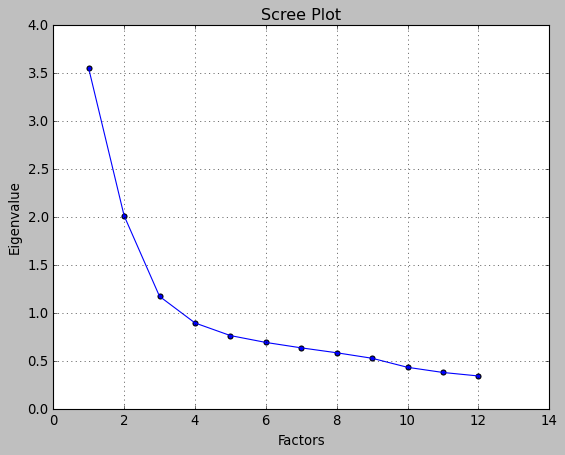

In [49]:
import matplotlib.pyplot as plt
plt.scatter(range(1, for_factor.shape[1]+1), eigen_values)
plt.plot(range(1, for_factor.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Только для трех факторов собственные значения больше единицы. Возьмем 3 фактора. 

Наконец, переходим к факторному анализу.

In [50]:
fa = FactorAnalyzer(rotation="varimax")
fa.fit(for_factor, 3)
fa.loadings_

array([[ 0.74779298, -0.05891711,  0.15126867],
       [ 0.64063174,  0.04511505,  0.16934704],
       [ 0.51236768, -0.06705902,  0.29620568],
       [ 0.47213806,  0.05215181,  0.37884607],
       [ 0.62621735, -0.10090427,  0.2248788 ],
       [ 0.18419221, -0.03692898,  0.67683875],
       [ 0.17109109,  0.22738397,  0.58254068],
       [ 0.21838346,  0.08371485,  0.52947064],
       [ 0.54184306, -0.0496084 ,  0.05672034],
       [-0.06093417,  0.45333214,  0.07945686],
       [-0.03365008,  0.90307024, -0.00896429],
       [-0.02000791,  0.61162651,  0.07478933]])

In [51]:
loadings = fa.loadings_

In [52]:
loadings[:, 0]

array([ 0.74779298,  0.64063174,  0.51236768,  0.47213806,  0.62621735,
        0.18419221,  0.17109109,  0.21838346,  0.54184306, -0.06093417,
       -0.03365008, -0.02000791])

In [53]:
factors = pd.DataFrame()
factors['Переменная'] = only_factors
factors['Первый фактор'] = loadings[:, 0]
factors['Второй фактор'] = loadings[:, 1]
factors['Третий фактор'] = loadings[:, 2]

In [54]:
factors

,Переменная,Первый фактор,Второй фактор,Третий фактор
0,Photos,0.747793,-0.058917,0.151269
1,Description,0.640632,0.045115,0.169347
2,Reviews,0.512368,-0.067059,0.296206
3,Rating,0.472138,0.052152,0.378846
4,Manager,0.626217,-0.100904,0.224879
5,BloggersAdvice,0.184192,-0.036929,0.676839
6,FriendAdvice,0.171091,0.227384,0.582541
7,InterestingPosts,0.218383,0.083715,0.529471
8,Prices,0.541843,-0.049608,0.056720
9,Overpriced,-0.060934,0.453332,0.079457


Видим, что присутствуют перекрестные нагрузки у переменных Reviews и Rating. Удалим их и проведем факторный анализ заново 

In [55]:
for_factor2 = for_factor.drop(['Reviews', 'Rating'], 1)

In [56]:
fa = FactorAnalyzer()
fa.fit(for_factor2)
eigen_values, vectors = fa.get_eigenvalues()

In [57]:
eigen_values

array([2.8252055 , 2.00283593, 1.17173471, 0.80510516, 0.74761945,
       0.63856771, 0.55241869, 0.50447956, 0.40520934, 0.34682395])

In [58]:
vectors

array([ 2.2747786 ,  1.56741866,  0.66037027,  0.19419009,  0.11811298,
        0.01787827, -0.00723823, -0.07973854, -0.10829641, -0.16089385])

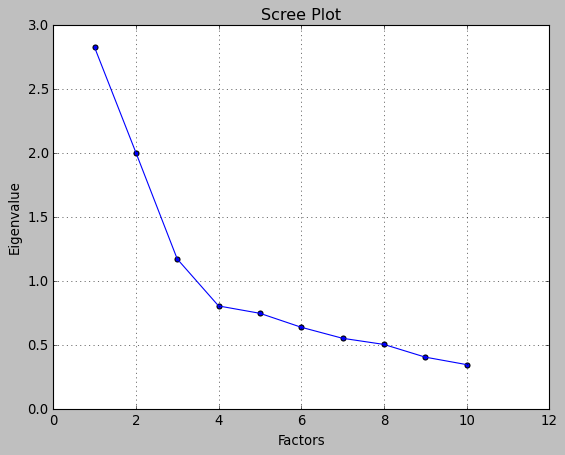

In [59]:
import matplotlib.pyplot as plt
plt.scatter(range(1, for_factor2.shape[1]+1), eigen_values)
plt.plot(range(1, for_factor2.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [60]:
fa = FactorAnalyzer(rotation="varimax")
fa.fit(for_factor2, 3)
fa.loadings_

array([[ 0.76025847, -0.066489  ,  0.17240629],
       [ 0.56682194,  0.03806061,  0.18876918],
       [ 0.6525166 , -0.10995623,  0.24986311],
       [ 0.17075224, -0.04700119,  0.67422289],
       [ 0.15467823,  0.21960677,  0.62328564],
       [ 0.20052622,  0.07543745,  0.51697957],
       [ 0.56117271, -0.05361962,  0.06828326],
       [-0.07930168,  0.45586132,  0.07004196],
       [-0.00682358,  0.89984565,  0.01070057],
       [-0.02652828,  0.60943476,  0.07640823]])

In [61]:
fact = pd.DataFrame(fa.transform(for_factor2))

In [62]:
fact.head()

,0,1,2
0,0.084857,0.586187,-0.717900
1,-1.076890,1.542621,-0.833344
2,-0.659567,0.581510,0.387851
3,0.890636,-0.155874,0.309448
4,-0.274539,-0.065803,-0.011146


In [63]:
loadings = fa.loadings_

In [64]:
factors = pd.DataFrame()
factors['Переменная'] = ['Photos', 'Description', 'Manager', 'BloggersAdvice', 
                'FriendAdvice', 'InterestingPosts', 'Prices', 'Overpriced', 'Quality', 'Fraud']
factors['Первый фактор'] = loadings[:, 0]
factors['Второй фактор'] = loadings[:, 1]
factors['Третий фактор'] = loadings[:, 2]

In [65]:
factors

,Переменная,Первый фактор,Второй фактор,Третий фактор
0,Photos,0.760258,-0.066489,0.172406
1,Description,0.566822,0.038061,0.188769
2,Manager,0.652517,-0.109956,0.249863
3,BloggersAdvice,0.170752,-0.047001,0.674223
4,FriendAdvice,0.154678,0.219607,0.623286
5,InterestingPosts,0.200526,0.075437,0.516980
6,Prices,0.561173,-0.053620,0.068283
7,Overpriced,-0.079302,0.455861,0.070042
8,Quality,-0.006824,0.899846,0.010701
9,Fraud,-0.026528,0.609435,0.076408


Факторный анализ завершен.

К первому фактору Информативность относятся: Фото, Описание, Менеджер, Цена;

Ко второму фактору Коммуникация относятся : Блогеры, Друзья, Интересные посты;

К третьему фактору Недоверие относятся: Завышенные цены, Качество, Мошенники.

## Кластерный анализ

На основании полученных факторов кластеризуем данные.

In [66]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [67]:
Z = linkage(fact, 'ward')

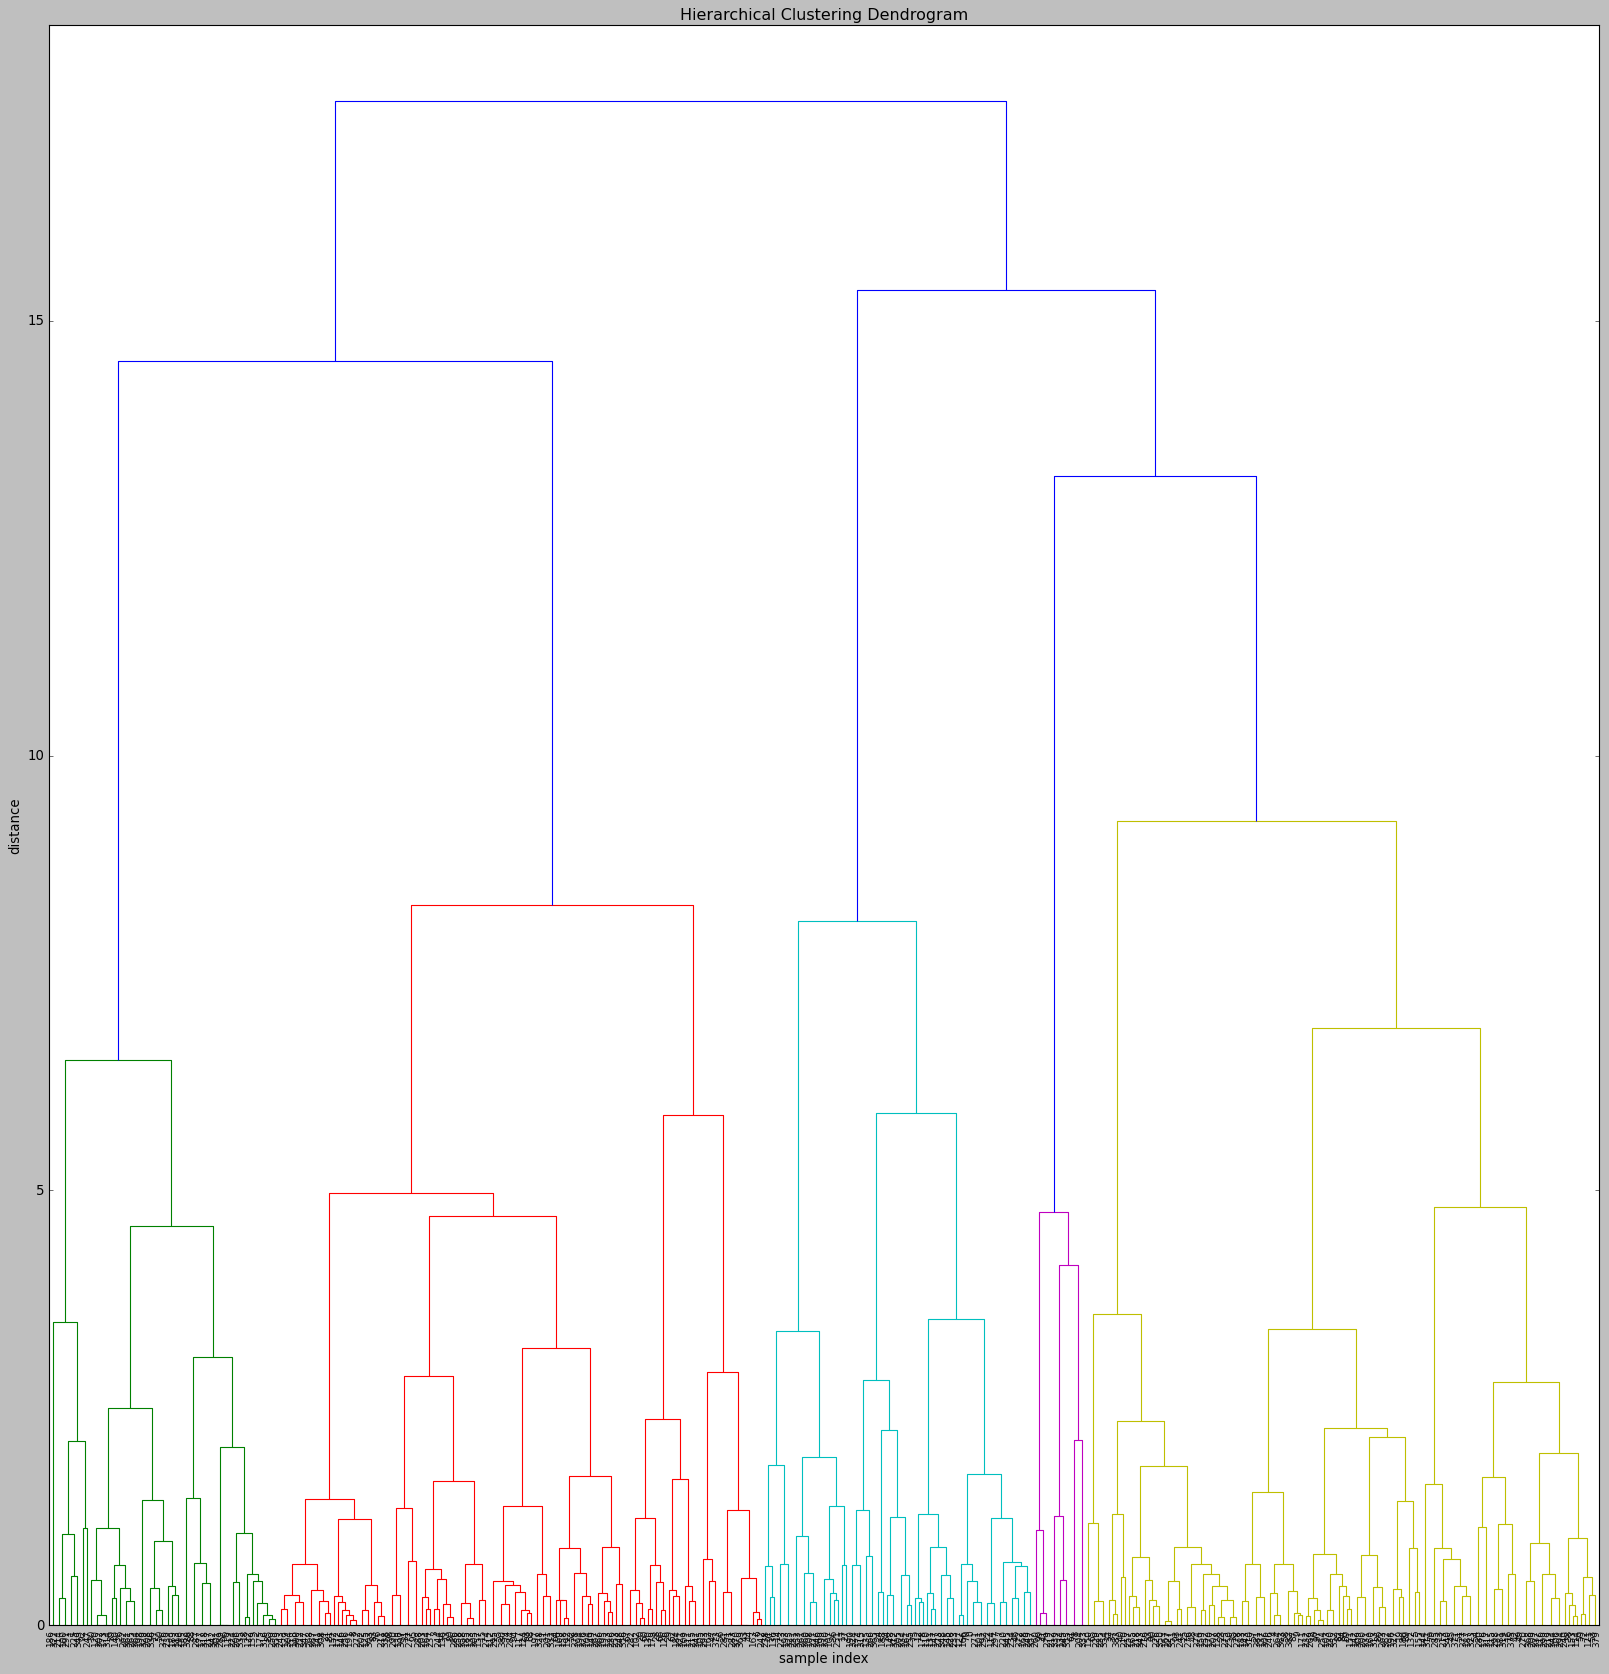

In [68]:
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

По графику видим, что оптимальное количество кластеров в наших данных ранво пяти.

In [119]:
clustering = AgglomerativeClustering(5).fit(fact)

clustering.labels_

array([2, 3, 3, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 3, 0, 1, 1,
       2, 0, 2, 0, 3, 2, 1, 1, 3, 1, 0, 0, 2, 0, 2, 0, 0, 3, 0, 4, 0, 1,
       1, 0, 2, 1, 0, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 4, 1, 1, 1, 0,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 3, 4, 0, 1, 1, 0, 1, 0, 3, 0, 0,
       3, 0, 0, 2, 3, 0, 1, 1, 3, 0, 1, 4, 3, 2, 1, 0, 1, 1, 0, 2, 2, 1,
       2, 1, 1, 3, 2, 0, 0, 1, 1, 3, 3, 0, 3, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       0, 1, 4, 2, 2, 0, 1, 3, 3, 1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 3, 2, 3,
       0, 3, 2, 1, 0, 0, 3, 0, 1, 1, 3, 0, 2, 3, 2, 1, 1, 2, 1, 1, 0, 1,
       3, 2, 0, 1, 1, 1, 4, 2, 3, 0, 3, 0, 0, 1, 4, 0, 3, 1, 0, 3, 0, 0,
       2, 2, 1, 2, 3, 3, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 3, 0, 0,
       1, 1, 1, 4, 0, 3, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 3, 4, 2, 3, 0,
       0, 3, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 4, 0, 1, 1, 1, 1, 0,
       1, 3, 1, 3, 1, 3, 2, 1, 0, 1, 3, 2, 0, 0, 1,

Присвоим кластеры каждому респонденту в исходой таблице данных

In [496]:
data['Кластер'] = clustering.labels_

In [121]:
pd.set_option('display.max_columns', 100)

In [497]:
data.head()

,ShoppingFrequency,PurchaseDecisionTime,FriendsOpinion,Photos,Description,Reviews,Rating,Manager,BloggersAdvice,FriendAdvice,InterestingPosts,Prices,Overpriced,Quality,Fraud,Sex,Age,Education,Income,В поисковой выдаче Яндекс/Google/другого поисковика,Другое,На других интернет-площадках магазина,Реклама в ленте/сториз Instagram,Реклама у блогеров,Рекомендации Instagram,Советы друзей/знакомых,Кластер
0,Раз в полгода,Около недели,"Редко, но бывает",5,3,4,4,3,2,3,3,5,4,4,4,Мужской,21.0,Незаконченное высшее (3 курса вуза и выше) про...,51 000 – 60 000,0,0,0,1,0,0,0,2
1,Раз в год,Несколько месяцев,Никогда,3,4,1,5,2,1,4,2,4,4,5,5,Женский,21.0,Высшее профессиональное образование - Бакалавриат,61 000 – 70 000,0,0,0,0,1,0,0,3
2,Реже одного раза в год,Несколько дней,"Редко, но бывает",4,4,3,3,4,4,4,2,2,2,4,4,Женский,21.0,Незаконченное высшее (3 курса вуза и выше) про...,71 000 – 80 000,0,0,1,0,0,0,0,3
3,Раз в год,Несколько недель,"Часто, но не всегда",5,5,5,4,5,3,4,4,5,3,3,4,Женский,21.0,Незаконченное высшее (3 курса вуза и выше) про...,41 000 – 50 000,0,0,1,0,0,0,0,1
4,"Не покупал-(а), но планирую попробовать",Несколько месяцев,"Редко, но бывает",3,5,3,3,5,3,4,1,4,3,3,5,Женский,45.0,Высшее профессиональное образование – Магистра...,51 000 – 60 000,0,0,1,0,0,0,0,0


Проанализируем кластеры с помощью описательной статистики

In [1]:
import pandas as pd
df = pd.read_excel('data_with_clusters.xlsx')

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [124]:
plt.style.use('ggplot')

<AxesSubplot:ylabel='Photos'>

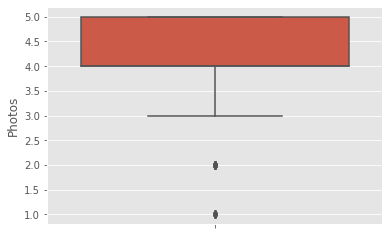

In [280]:
sns.boxplot(y="Photos", data=data)

In [281]:
data.Photos.median()

4.0

In [4]:
df.Photos.mean()

4.192708333333333

<AxesSubplot:ylabel='Description'>

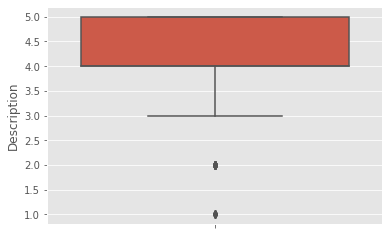

In [282]:
sns.boxplot(y="Description", data=data)

In [283]:
data.Description.median()

4.0

In [5]:
df.Description.mean()

4.083333333333333

<AxesSubplot:ylabel='Reviews'>

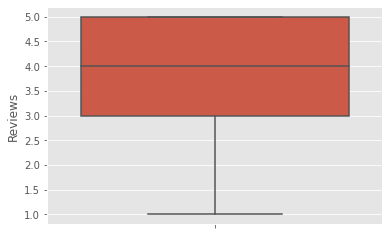

In [284]:
sns.boxplot(y="Reviews", data=data)

In [285]:
data.Reviews.median()

4.0

In [6]:
df.Reviews.mean()

4.002604166666667

<AxesSubplot:ylabel='Rating'>

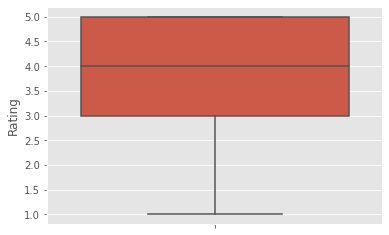

In [286]:
sns.boxplot(y="Rating", data=data)

In [288]:
data.Rating.median()

4.0

In [7]:
df.Rating.mean()

3.7708333333333335

<AxesSubplot:ylabel='Manager'>

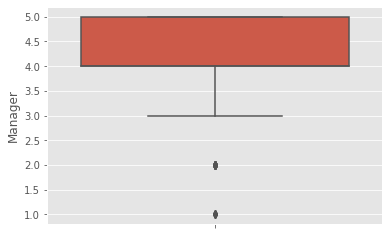

In [289]:
sns.boxplot(y="Manager", data=data)

In [290]:
data.Manager.median()

4.0

In [8]:
df.Manager.mean()

4.161458333333333

<AxesSubplot:ylabel='BloggersAdvice'>

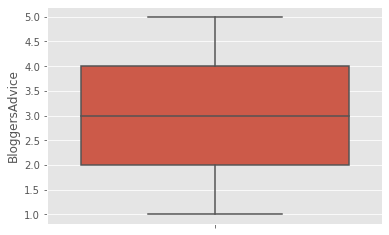

In [291]:
sns.boxplot(y="BloggersAdvice", data=data)

In [292]:
data.BloggersAdvice.median()

3.0

In [9]:
df.BloggersAdvice.mean()

2.890625

<AxesSubplot:ylabel='FriendAdvice'>

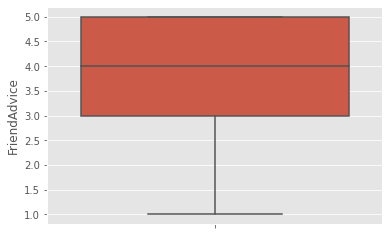

In [293]:
sns.boxplot(y="FriendAdvice", data=data)

In [294]:
data.FriendAdvice.median()

4.0

In [10]:
df.FriendAdvice.mean()

3.7942708333333335

<AxesSubplot:ylabel='InterestingPosts'>

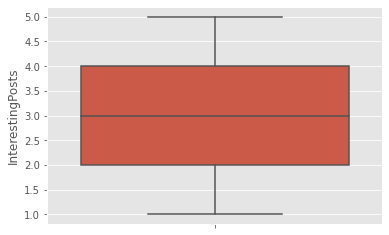

In [296]:
sns.boxplot(y="InterestingPosts", data=data)

In [297]:
data.InterestingPosts.median()

3.0

In [11]:
df.InterestingPosts.mean()

2.8203125

<AxesSubplot:ylabel='Prices'>

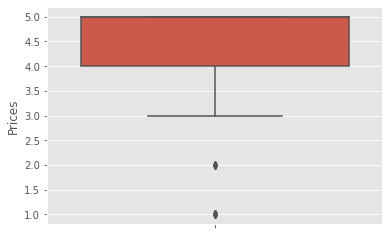

In [298]:
sns.boxplot(y="Prices", data=data)

In [299]:
data.Prices.median()

5.0

In [12]:
df.Prices.mean()

4.317708333333333

<AxesSubplot:ylabel='Overpriced'>

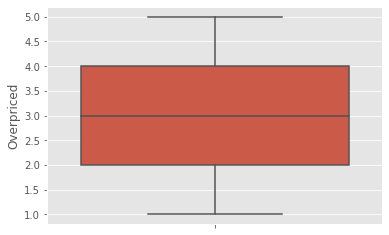

In [300]:
sns.boxplot(y="Overpriced", data=data)

In [301]:
data.Overpriced.median()

3.0

In [13]:
df.Overpriced.mean()

2.7942708333333335

<AxesSubplot:ylabel='Quality'>

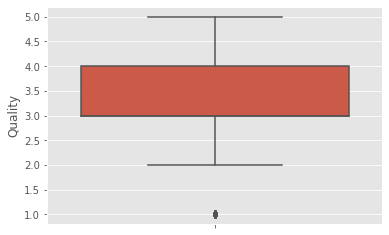

In [302]:
sns.boxplot(y="Quality", data=data)

In [303]:
data.Quality.median()

3.0

In [15]:
df.Quality.mean()

3.3411458333333335

<AxesSubplot:ylabel='Fraud'>

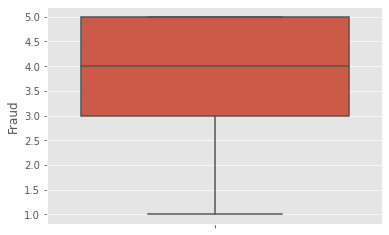

In [304]:
sns.boxplot(y="Fraud", data=data)

In [305]:
data.Fraud.median()

4.0

In [14]:
df.Fraud.mean()

3.4921875

<AxesSubplot:xlabel='Кластер', ylabel='Photos'>

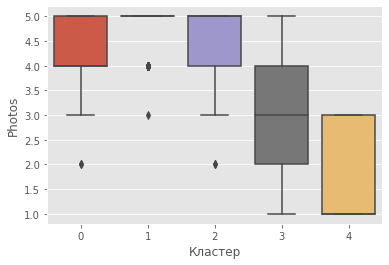

In [125]:
sns.boxplot(x="Кластер", y="Photos", data=data)

In [2]:
df.groupby(['Кластер']).Photos.mean()

Кластер
0    4.220472
1    4.783333
2    4.492537
3    3.105263
4    1.692308
Name: Photos, dtype: float64

<AxesSubplot:xlabel='Кластер', ylabel='Description'>

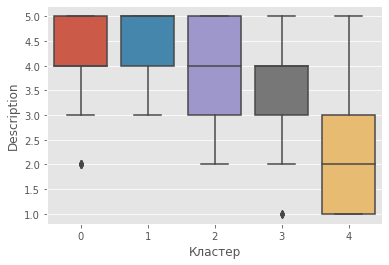

In [127]:
sns.boxplot(x="Кластер", y="Description", data=data)

In [3]:
df.groupby(['Кластер']).Description.mean()

Кластер
0    3.968504
1    4.616667
2    4.089552
3    3.596491
4    2.384615
Name: Description, dtype: float64

<AxesSubplot:xlabel='Кластер', ylabel='Reviews'>

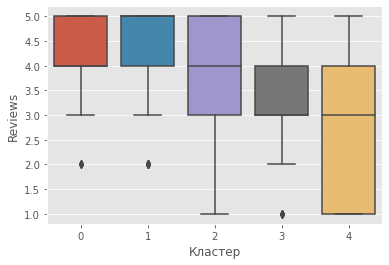

In [129]:
sns.boxplot(x="Кластер", y="Reviews", data=data)

In [4]:
df.groupby(['Кластер']).Reviews.mean()

Кластер
0    4.244094
1    4.258333
2    3.910448
3    3.315789
4    2.769231
Name: Reviews, dtype: float64

<AxesSubplot:xlabel='Кластер', ylabel='Rating'>

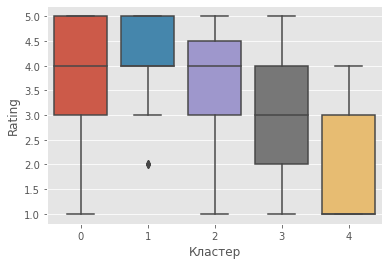

In [131]:
sns.boxplot(x="Кластер", y="Rating", data=data)

In [5]:
df.groupby(['Кластер']).Rating.mean()

Кластер
0    3.921260
1    4.241667
2    3.567164
3    3.070175
4    2.076923
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Кластер', ylabel='Manager'>

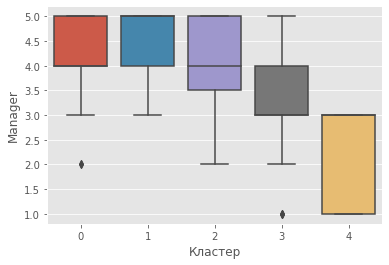

In [133]:
sns.boxplot(x="Кластер", y="Manager", data=data)

In [6]:
df.groupby(['Кластер']).Manager.mean()

Кластер
0    4.307087
1    4.666667
2    4.164179
3    3.210526
4    2.230769
Name: Manager, dtype: float64

<AxesSubplot:xlabel='Кластер', ylabel='BloggersAdvice'>

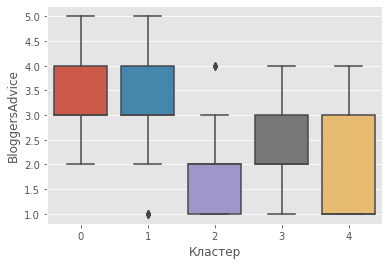

In [135]:
sns.boxplot(x="Кластер", y="BloggersAdvice", data=data)

In [136]:
data.groupby(['Кластер']).BloggersAdvice.median()

Кластер
0    3
1    3
2    2
3    2
4    1
Name: BloggersAdvice, dtype: int64

<AxesSubplot:xlabel='Кластер', ylabel='FriendAdvice'>

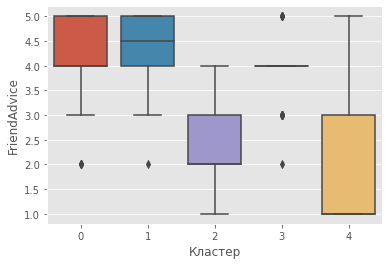

In [137]:
sns.boxplot(x="Кластер", y="FriendAdvice", data=data)

In [7]:
df.groupby(['Кластер']).FriendAdvice.mean()

Кластер
0    4.110236
1    4.375000
2    2.402985
3    3.894737
4    2.076923
Name: FriendAdvice, dtype: float64

<AxesSubplot:xlabel='Кластер', ylabel='InterestingPosts'>

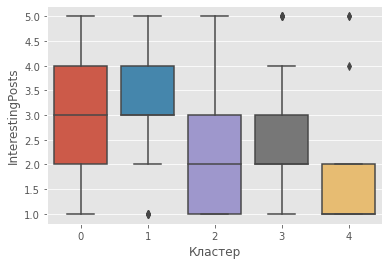

In [139]:
sns.boxplot(x="Кластер", y="InterestingPosts", data=data)

In [140]:
data.groupby(['Кластер']).InterestingPosts.median()

Кластер
0    3
1    3
2    2
3    2
4    1
Name: InterestingPosts, dtype: int64

<AxesSubplot:xlabel='Кластер', ylabel='Prices'>

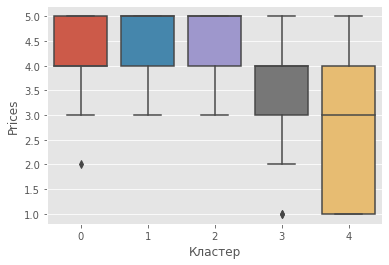

In [141]:
sns.boxplot(x="Кластер", y="Prices", data=data)

In [142]:
data.groupby(['Кластер']).Prices.median()

Кластер
0    4
1    5
2    5
3    4
4    3
Name: Prices, dtype: int64

<AxesSubplot:xlabel='Кластер', ylabel='Overpriced'>

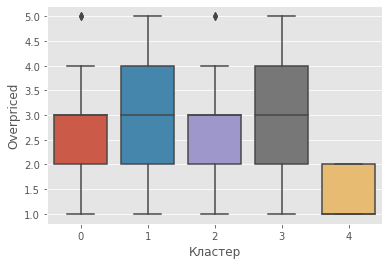

In [143]:
sns.boxplot(x="Кластер", y="Overpriced", data=data)

In [144]:
data.groupby(['Кластер']).Overpriced.median()

Кластер
0    3
1    3
2    3
3    3
4    1
Name: Overpriced, dtype: int64

<AxesSubplot:xlabel='Кластер', ylabel='Quality'>

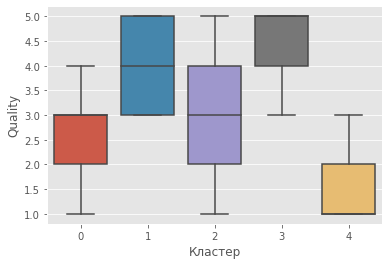

In [145]:
sns.boxplot(x="Кластер", y="Quality", data=data)

In [8]:
df.groupby(['Кластер']).Quality.mean()

Кластер
0    2.543307
1    3.950000
2    3.149254
3    4.473684
4    1.538462
Name: Quality, dtype: float64

<AxesSubplot:xlabel='Кластер', ylabel='Fraud'>

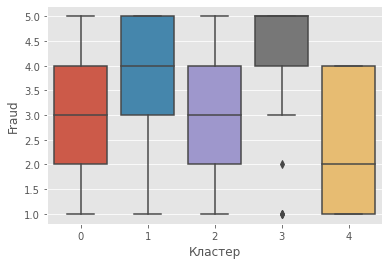

In [147]:
sns.boxplot(x="Кластер", y="Fraud", data=data)

In [9]:
df.groupby(['Кластер']).Fraud.mean()

Кластер
0    2.992126
1    3.966667
2    3.208955
3    4.210526
4    2.307692
Name: Fraud, dtype: float64

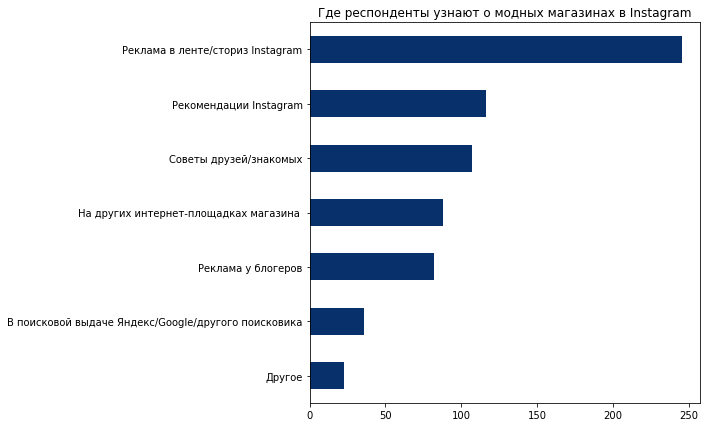

In [10]:
ads = df.sum()[19:26].sort_values()
ads.plot(kind='barh', figsize=(7,7), cmap="Blues_r")
plt.title('Где респонденты узнают о модных магазинах в Instagram')
plt.show()

In [11]:
ads

Другое                                                  23
В поисковой выдаче Яндекс/Google/другого поисковика     36
Реклама у блогеров                                      82
На других интернет-площадках магазина                   88
Советы друзей/знакомых                                 107
Рекомендации Instagram                                 116
Реклама в ленте/сториз Instagram                       245
dtype: object

In [14]:
107/384 * 100

27.864583333333332

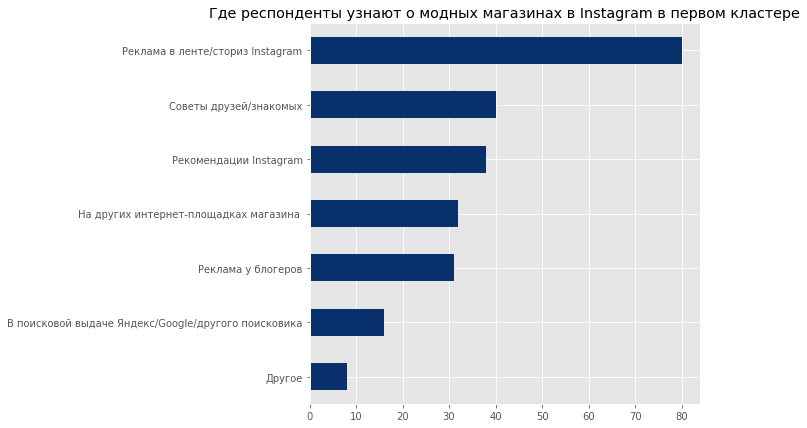

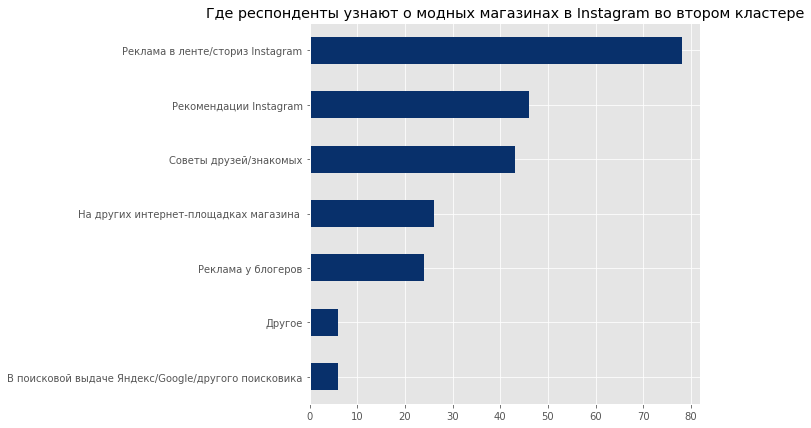

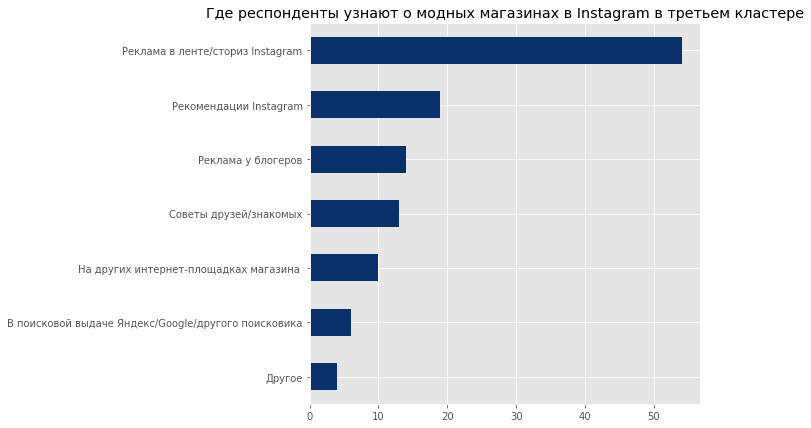

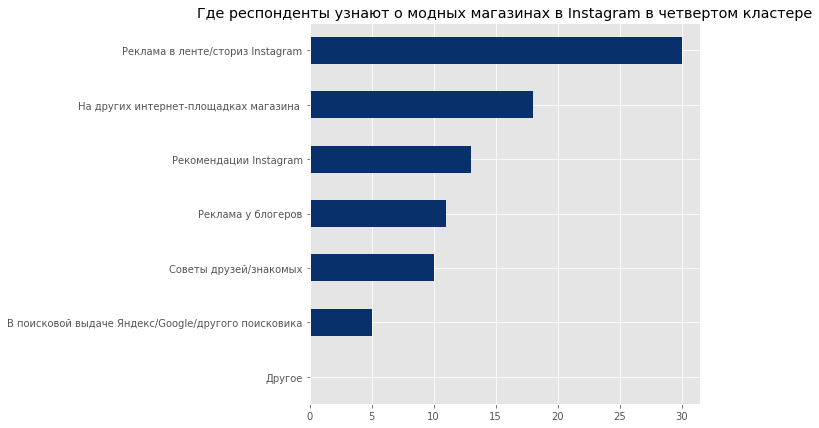

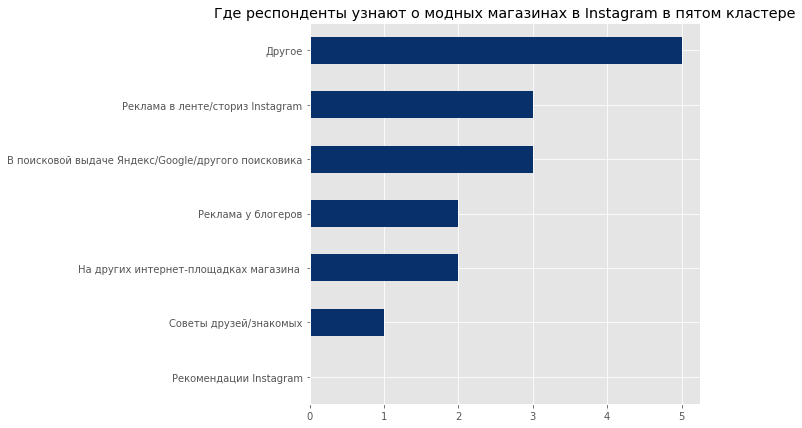

In [538]:
ads1 = data[data['Кластер'] == 0].sum()[19:26].sort_values()
ads1.plot(kind='barh', figsize=(7,7), cmap="Blues_r")
plt.title('Где респонденты узнают о модных магазинах в Instagram в первом кластере')
plt.show()

ads2 = data[data['Кластер'] == 1].sum()[19:26].sort_values()
ads2.plot(kind='barh', figsize=(7,7), cmap="Blues_r")
plt.title('Где респонденты узнают о модных магазинах в Instagram во втором кластере')
plt.show()

ads3 = data[data['Кластер'] == 2].sum()[19:26].sort_values()
ads3.plot(kind='barh', figsize=(7,7), cmap="Blues_r")
plt.title('Где респонденты узнают о модных магазинах в Instagram в третьем кластере')
plt.show()

ads4 = data[data['Кластер'] == 3].sum()[19:26].sort_values()
ads4.plot(kind='barh', figsize=(7,7), cmap="Blues_r")
plt.title('Где респонденты узнают о модных магазинах в Instagram в четвертом кластере')
plt.show()

ads5 = data[data['Кластер'] == 4].sum()[19:26].sort_values()
ads5.plot(kind='barh', figsize=(7,7), cmap="Blues_r")
plt.title('Где респонденты узнают о модных магазинах в Instagram в пятом кластере')
plt.show()

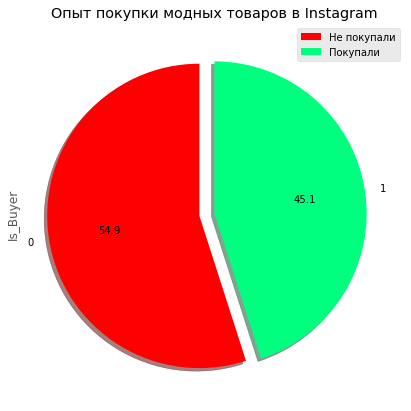

In [185]:
buyers = data.groupby(['Is_Buyer']).Is_Buyer.count()
buyers.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'], 
            shadow = 1, startangle = 90, explode = (0.1, 0), autopct='%.1f')
plt.title('Опыт покупки модных товаров в Instagram')
plt.legend(['Не покупали', 'Покупали'])
plt.show()

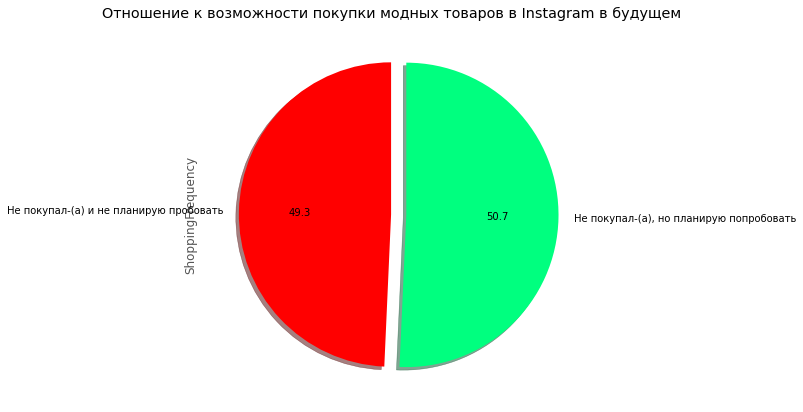

In [244]:
buyers = data[data['Is_Buyer'] == 0].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'],
            shadow = 1, startangle = 90, explode = (0, 0.1), autopct='%.1f')
plt.title('Отношение к возможности покупки модных товаров в Instagram в будущем')

plt.show()

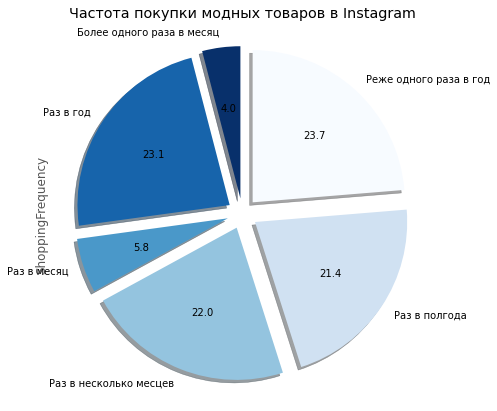

In [245]:
buyers = data[data['Is_Buyer'] == 1].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Частота покупки модных товаров в Instagram')

plt.show()

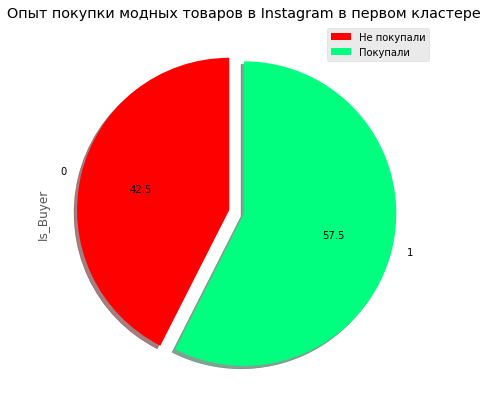

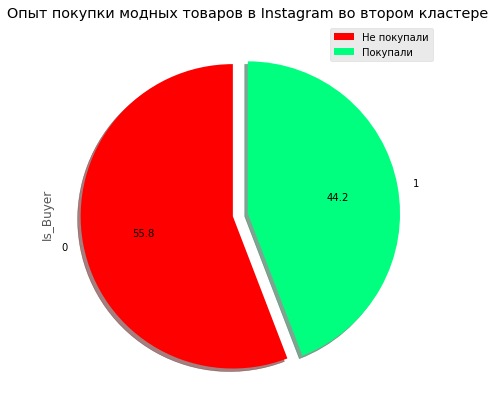

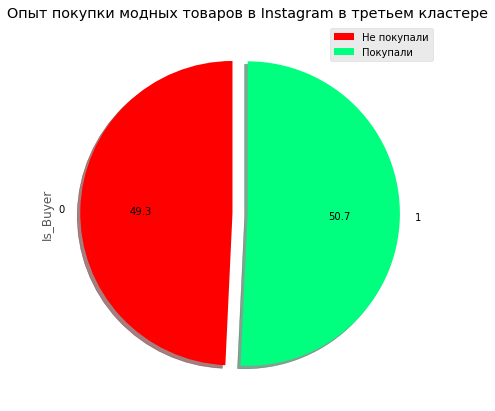

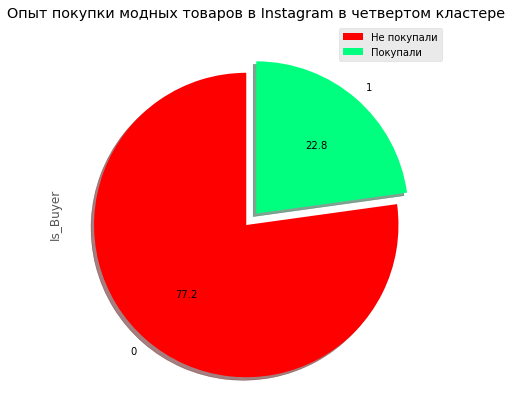

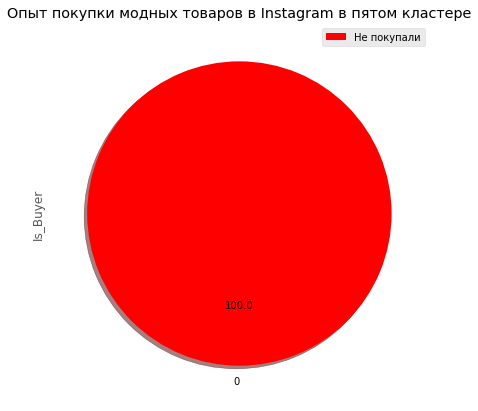

In [212]:
buyers1 = data[data['Кластер'] == 0].groupby(['Is_Buyer']).Is_Buyer.count()
buyers1.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'], 
            shadow = 1, startangle = 90, explode = (0.1, 0), autopct='%.1f')
plt.title('Опыт покупки модных товаров в Instagram в первом кластере')
plt.legend(['Не покупали', 'Покупали'])

plt.show()

buyers2 = data[data['Кластер'] == 1].groupby(['Is_Buyer']).Is_Buyer.count()
buyers2.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'], 
            shadow = 1, startangle = 90, explode = (0.1, 0), autopct='%.1f')
plt.title('Опыт покупки модных товаров в Instagram во втором кластере')
plt.legend(['Не покупали', 'Покупали'])

plt.show()

buyers3 = data[data['Кластер'] == 2].groupby(['Is_Buyer']).Is_Buyer.count()
buyers3.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'], 
            shadow = 1, startangle = 90, explode = (0.1, 0), autopct='%.1f')
plt.title('Опыт покупки модных товаров в Instagram в третьем кластере')
plt.legend(['Не покупали', 'Покупали'])

plt.show()

buyers4 = data[data['Кластер'] == 3].groupby(['Is_Buyer']).Is_Buyer.count()
buyers4.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'], 
            shadow = 1, startangle = 90, explode = (0.1, 0), autopct='%.1f')
plt.title('Опыт покупки модных товаров в Instagram в четвертом кластере')
plt.legend(['Не покупали', 'Покупали'])

plt.show()

buyers5 = data[data['Кластер'] == 4].groupby(['Is_Buyer']).Is_Buyer.count()
buyers5.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'], 
            shadow = 1, startangle = 90, explode = None, autopct='%.1f')
plt.title('Опыт покупки модных товаров в Instagram в пятом кластере')
plt.legend(['Не покупали'])

plt.show()

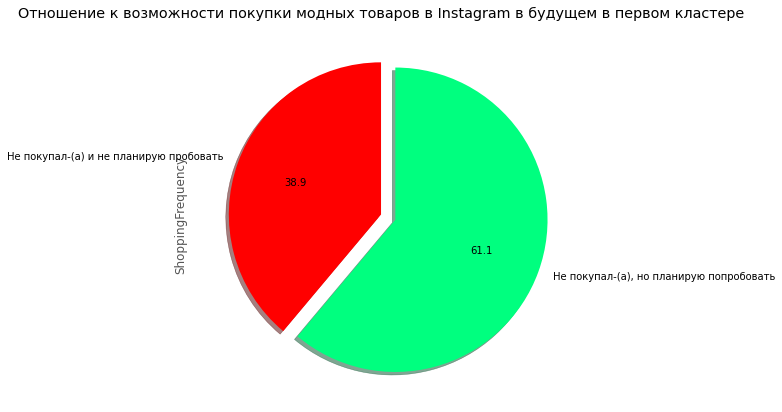

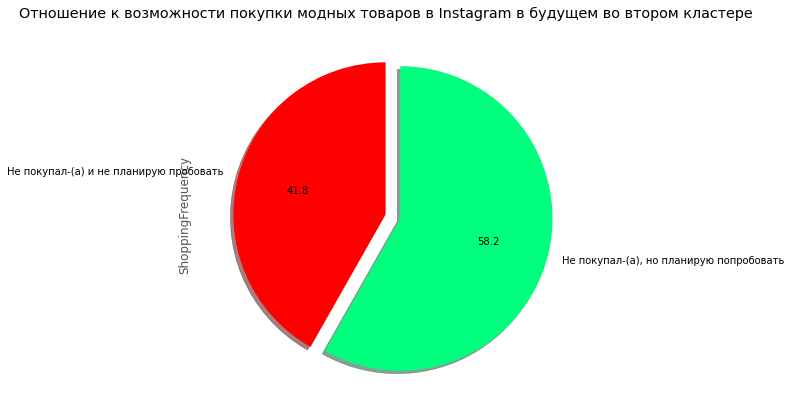

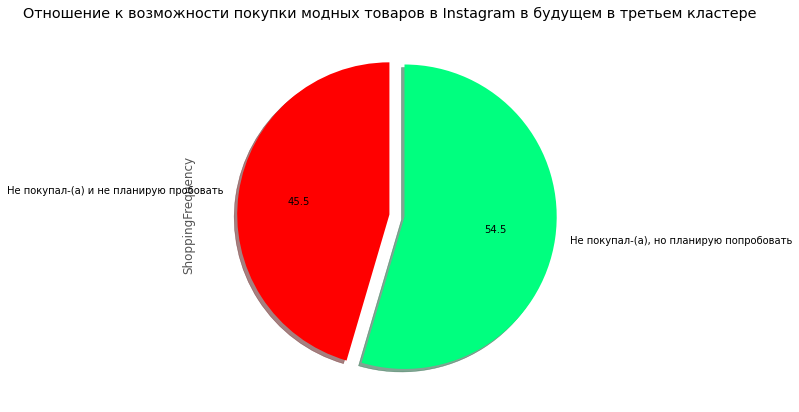

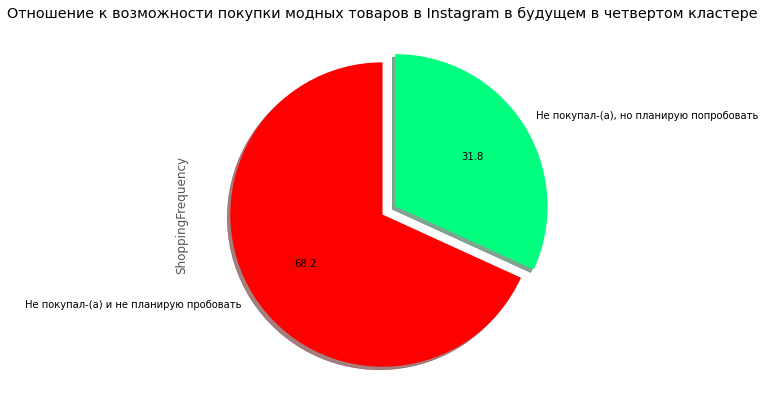

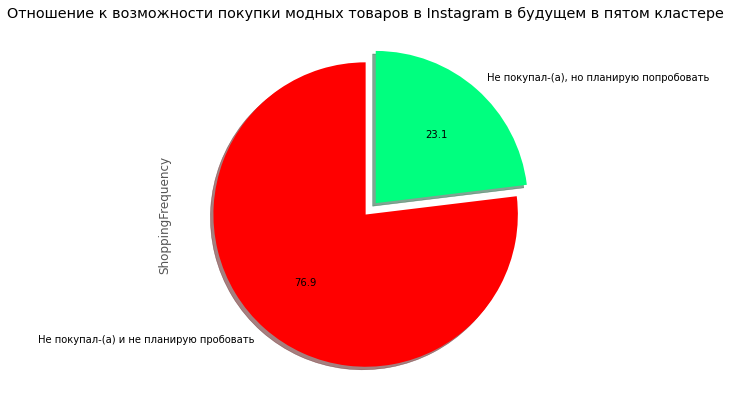

In [246]:
buyers1 = data[(data['Кластер'] == 0) & (data['Is_Buyer'] == 0)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers1.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'],
            shadow = 1, startangle = 90, explode = (0, 0.1), autopct='%.1f')
plt.title('Отношение к возможности покупки модных товаров в Instagram в будущем в первом кластере')

plt.show()

buyers2 = data[(data['Кластер'] == 1) & (data['Is_Buyer'] == 0)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers2.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'],
            shadow = 1, startangle = 90, explode = (0, 0.1), autopct='%.1f')
plt.title('Отношение к возможности покупки модных товаров в Instagram в будущем во втором кластере')

plt.show()

buyers3 = data[(data['Кластер'] == 2) & (data['Is_Buyer'] == 0)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers3.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'],
            shadow = 1, startangle = 90, explode = (0, 0.1), autopct='%.1f')
plt.title('Отношение к возможности покупки модных товаров в Instagram в будущем в третьем кластере')

plt.show()

buyers4 = data[(data['Кластер'] == 3) & (data['Is_Buyer'] == 0)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers4.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'],
            shadow = 1, startangle = 90, explode = (0, 0.1), autopct='%.1f')
plt.title('Отношение к возможности покупки модных товаров в Instagram в будущем в четвертом кластере')

plt.show()

buyers5 = data[(data['Кластер'] == 4) & (data['Is_Buyer'] == 0)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers5.plot(kind='pie', figsize=(7,7), colors= ['r', 'springgreen'],
            shadow = 1, startangle = 90, explode = (0, 0.1), autopct='%.1f')
plt.title('Отношение к возможности покупки модных товаров в Instagram в будущем в пятом кластере')

plt.show()

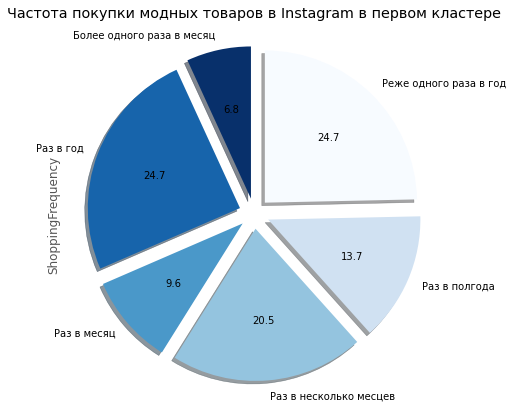

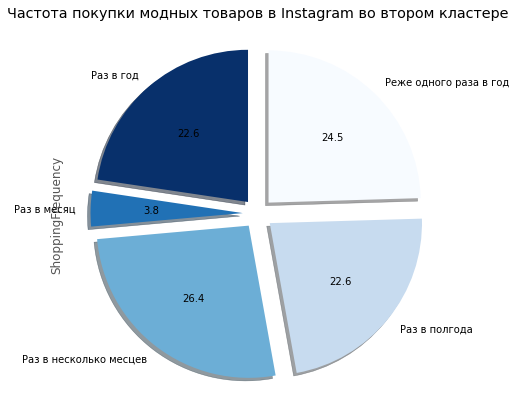

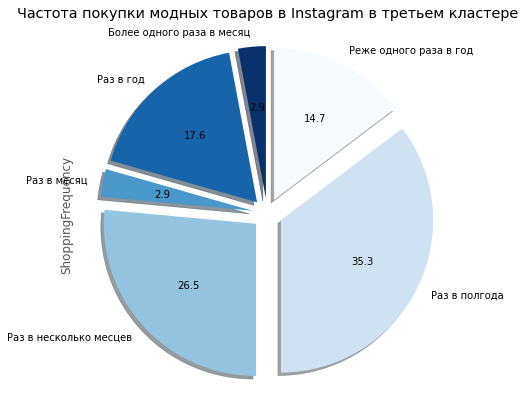

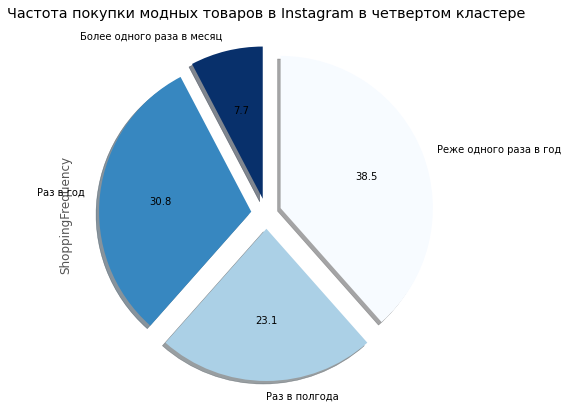

/Users/sofamaslova/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


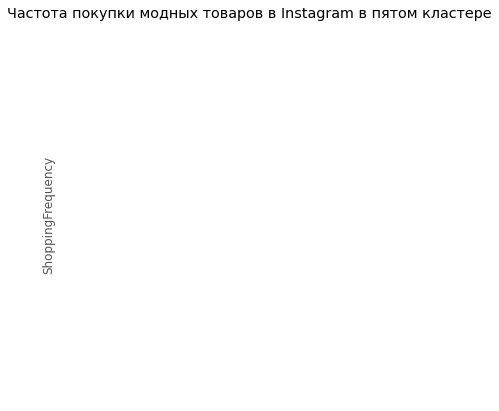

In [248]:
buyers1 = data[(data['Кластер'] == 0) & (data['Is_Buyer'] == 1)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers1.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Частота покупки модных товаров в Instagram в первом кластере')

plt.show()

buyers2 = data[(data['Кластер'] == 1) & (data['Is_Buyer'] == 1)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers2.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Частота покупки модных товаров в Instagram во втором кластере')

plt.show()

buyers3 = data[(data['Кластер'] == 2) & (data['Is_Buyer'] == 1)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers3.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Частота покупки модных товаров в Instagram в третьем кластере')

plt.show()

buyers4 = data[(data['Кластер'] == 3) & (data['Is_Buyer'] == 1)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers4.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Частота покупки модных товаров в Instagram в четвертом кластере')

plt.show()

buyers5 = data[(data['Кластер'] == 4) & (data['Is_Buyer'] == 1)].groupby(['ShoppingFrequency']).ShoppingFrequency.count()
buyers5.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = None, autopct='%.1f')
plt.title('Частота покупки модных товаров в Instagram в пятом кластере')

plt.show()


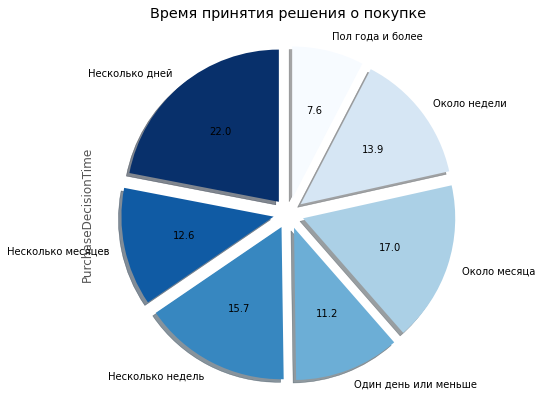

In [264]:
DecisionTime = data[data.PurchaseDecisionTime != 'Пока не покупал-(а) данную категорию товаров в Instagram'].groupby(['PurchaseDecisionTime']).PurchaseDecisionTime.count()
DecisionTime.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Время принятия решения о покупке')

plt.show()

In [260]:
data[(data.PurchaseDecisionTime != 'Пока не покупал-(а) данную категорию товаров в Instagram') & 
     (data['Кластер'] == 0)].groupby(['PurchaseDecisionTime']).PurchaseDecisionTime.count()

PurchaseDecisionTime
Несколько дней          19
Несколько месяцев       15
Несколько недель        15
Один день или меньше     8
Около месяца            13
Около недели            11
Пол года и более         7
Name: PurchaseDecisionTime, dtype: int64

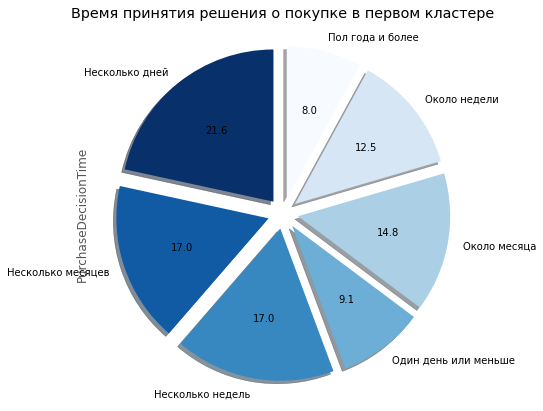

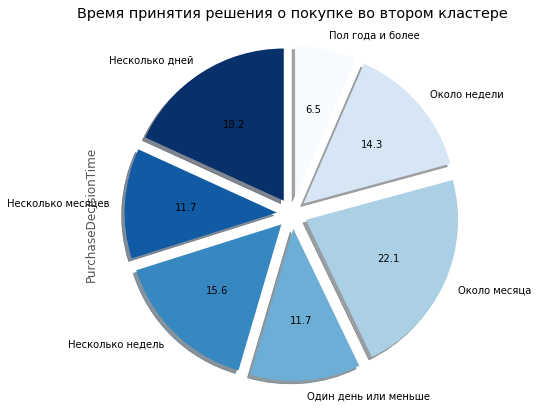

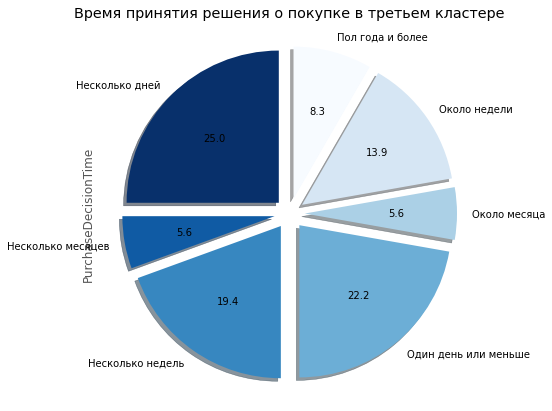

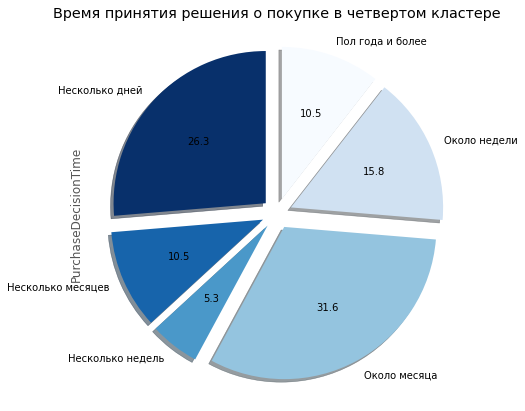

In [263]:
DecisionTime1 = data[(data.PurchaseDecisionTime != 'Пока не покупал-(а) данную категорию товаров в Instagram') & 
     (data['Кластер'] == 0)].groupby(['PurchaseDecisionTime']).PurchaseDecisionTime.count()
DecisionTime1.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Время принятия решения о покупке в первом кластере')

plt.show()

DecisionTime2 = data[(data.PurchaseDecisionTime != 'Пока не покупал-(а) данную категорию товаров в Instagram') 
                     & (data['Кластер'] == 1)].groupby(['PurchaseDecisionTime']).PurchaseDecisionTime.count()
DecisionTime2.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Время принятия решения о покупке во втором кластере')

plt.show()

DecisionTime3 = data[(data.PurchaseDecisionTime != 'Пока не покупал-(а) данную категорию товаров в Instagram') 
                     & (data['Кластер'] == 2)].groupby(['PurchaseDecisionTime']).PurchaseDecisionTime.count()
DecisionTime3.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Время принятия решения о покупке в третьем кластере')

plt.show()

DecisionTime4 = data[(data.PurchaseDecisionTime != 'Пока не покупал-(а) данную категорию товаров в Instagram') 
                     & (data['Кластер'] == 3)].groupby(['PurchaseDecisionTime']).PurchaseDecisionTime.count()
DecisionTime4.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Время принятия решения о покупке в четвертом кластере')

plt.show()

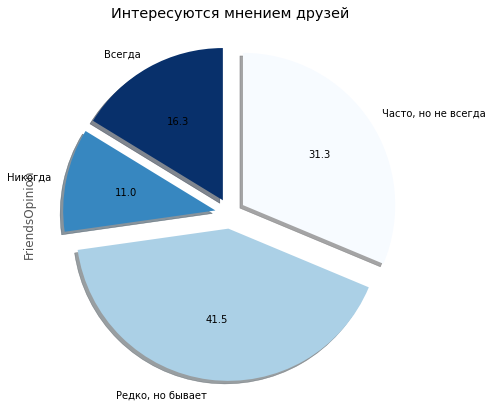

In [269]:
Friends = data[data.FriendsOpinion != 
               'Пока не покупал-(а) данную категорию товаров в Instagram'].groupby(['FriendsOpinion']).FriendsOpinion.count()
Friends.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Интересуются мнением друзей')

plt.show()

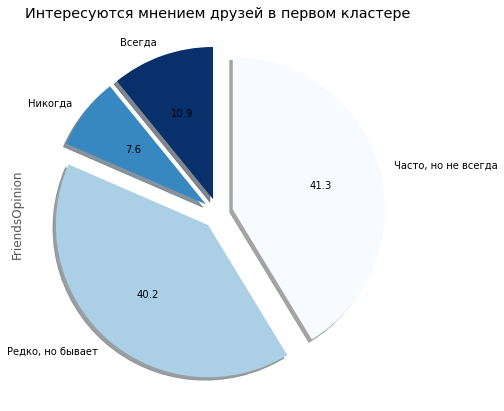

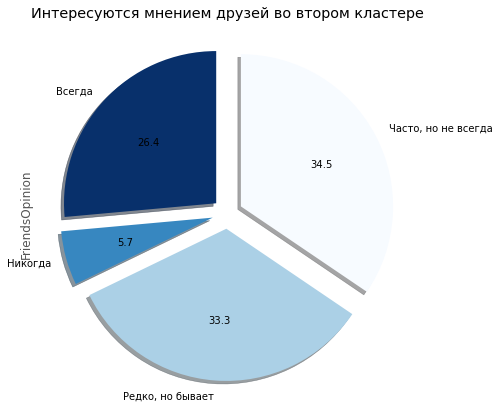

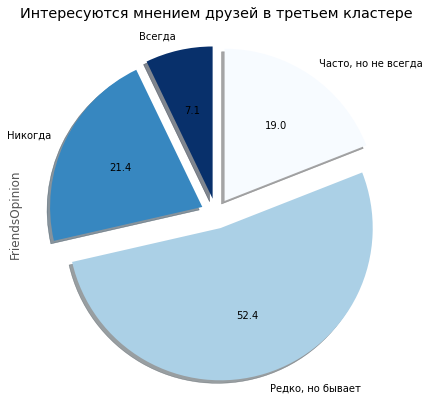

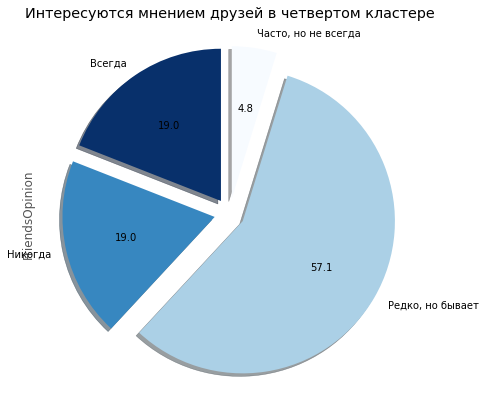

In [271]:
Friends1 = data[(data.FriendsOpinion != 'Пока не покупал-(а) данную категорию товаров в Instagram') & 
              (data['Кластер'] == 0)].groupby(['FriendsOpinion']).FriendsOpinion.count()
Friends1.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Интересуются мнением друзей в первом кластере')

plt.show()

Friends2 = data[(data.FriendsOpinion != 'Пока не покупал-(а) данную категорию товаров в Instagram') & 
              (data['Кластер'] == 1)].groupby(['FriendsOpinion']).FriendsOpinion.count()
Friends2.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Интересуются мнением друзей во втором кластере')

plt.show()

Friends2 = data[(data.FriendsOpinion != 'Пока не покупал-(а) данную категорию товаров в Instagram') & 
              (data['Кластер'] == 2)].groupby(['FriendsOpinion']).FriendsOpinion.count()
Friends2.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Интересуются мнением друзей в третьем кластере')

plt.show()

Friends3 = data[(data.FriendsOpinion != 'Пока не покупал-(а) данную категорию товаров в Instagram') & 
              (data['Кластер'] == 3)].groupby(['FriendsOpinion']).FriendsOpinion.count()
Friends3.plot(kind='pie', figsize=(7,7), cmap="Blues_r",
            shadow = 1, startangle = 90, explode = (0.1, 0.1, 0.1, 0.1), autopct='%.1f')
plt.title('Интересуются мнением друзей в четвертом кластере')

plt.show()

/Users/sofamaslova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


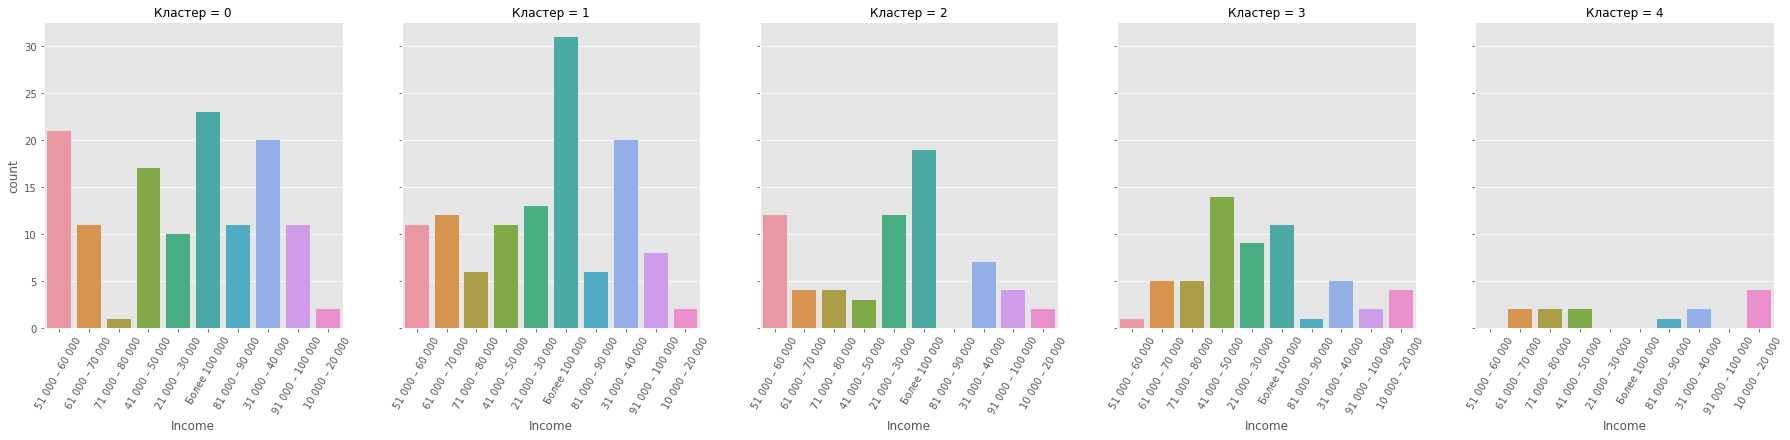

In [276]:
g = sns.catplot('Income', col = 'Кластер', data = data, kind = 'count')
g.set_xticklabels(rotation=60)

In [498]:
data.to_excel('data_with_clusters.xlsx', index=False) # сохраним данные с присвоенными кластерами

In [2]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame()
df['Number'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [7]:
df

,Number
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [10]:
df[df.Number % 2 == 0]

,Number
1,2
3,4
5,6
7,8
9,10
